In [198]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Matplotlib

For this excercise, we have written the following code to load the stock dataset built into plotly express.

In [4]:
stocks = px.data.stocks()
stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Question 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

Text(0.5, 0, 'date')

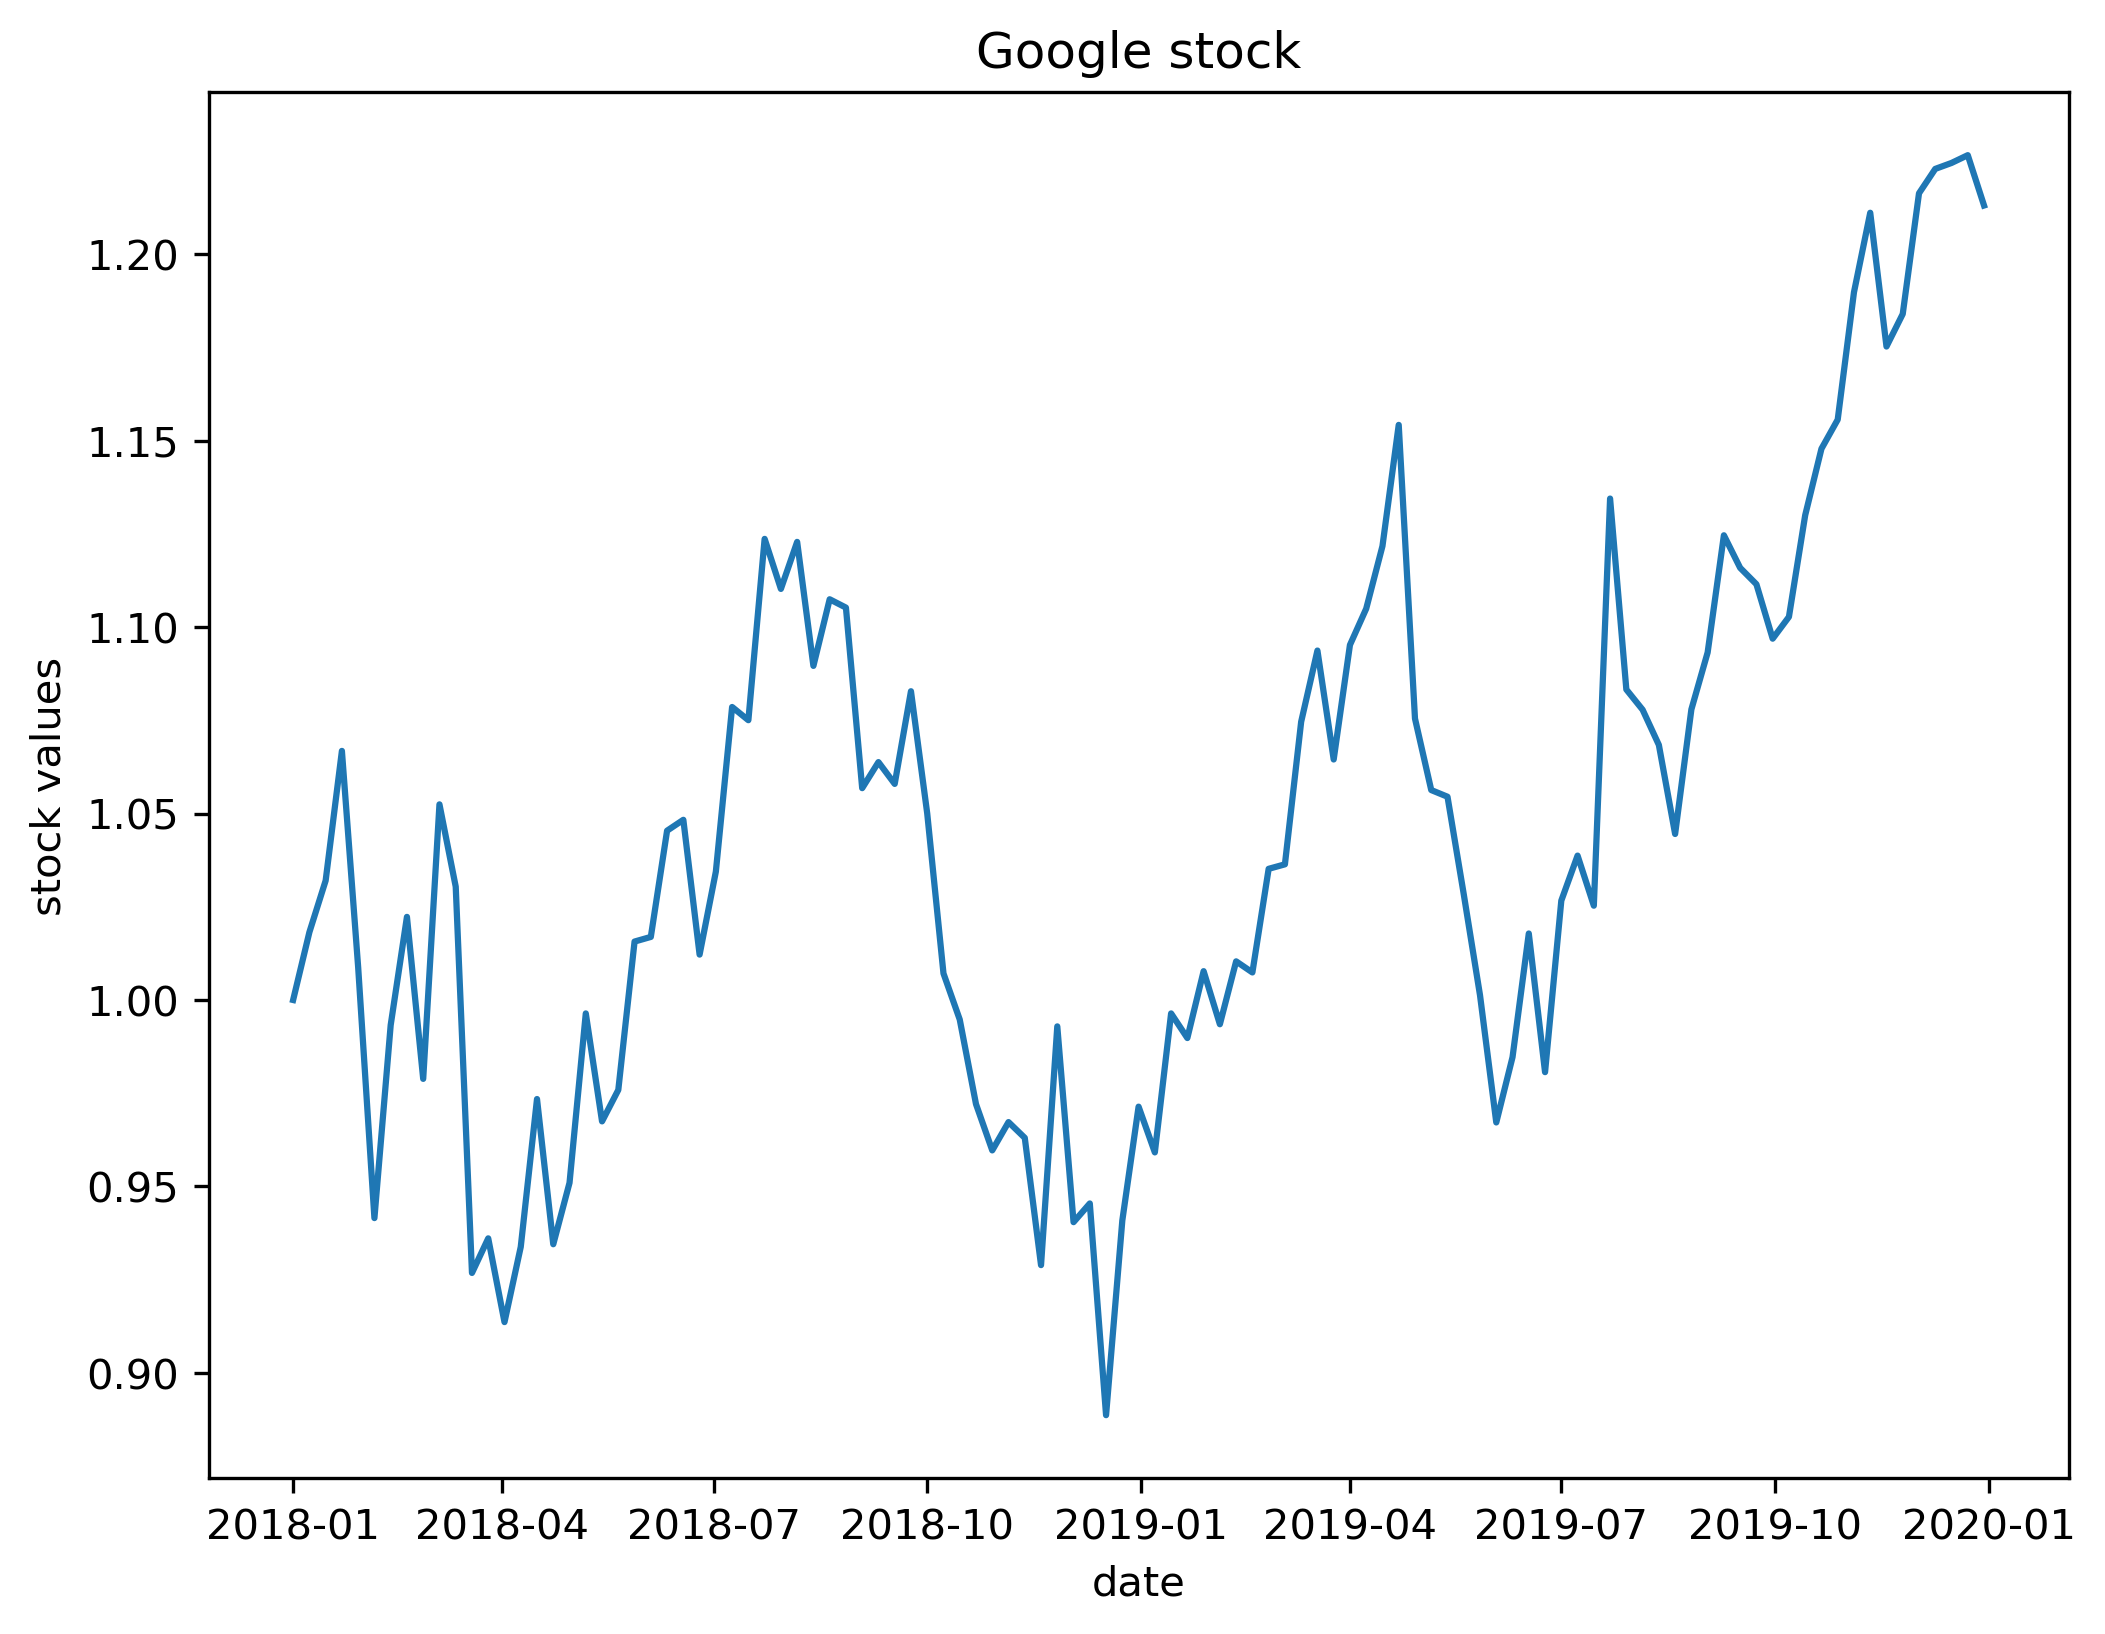

In [123]:
# YOUR CODE HERE
fig, ax = plt.subplots(dpi=300, figsize=(8,6))
date = pd.to_datetime(stocks['date']).dt.date
google = stocks['GOOG']
ax.plot(date, google)
plt.title('Google stock')
plt.ylabel('stock values')
plt.xlabel('date')

## Question 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

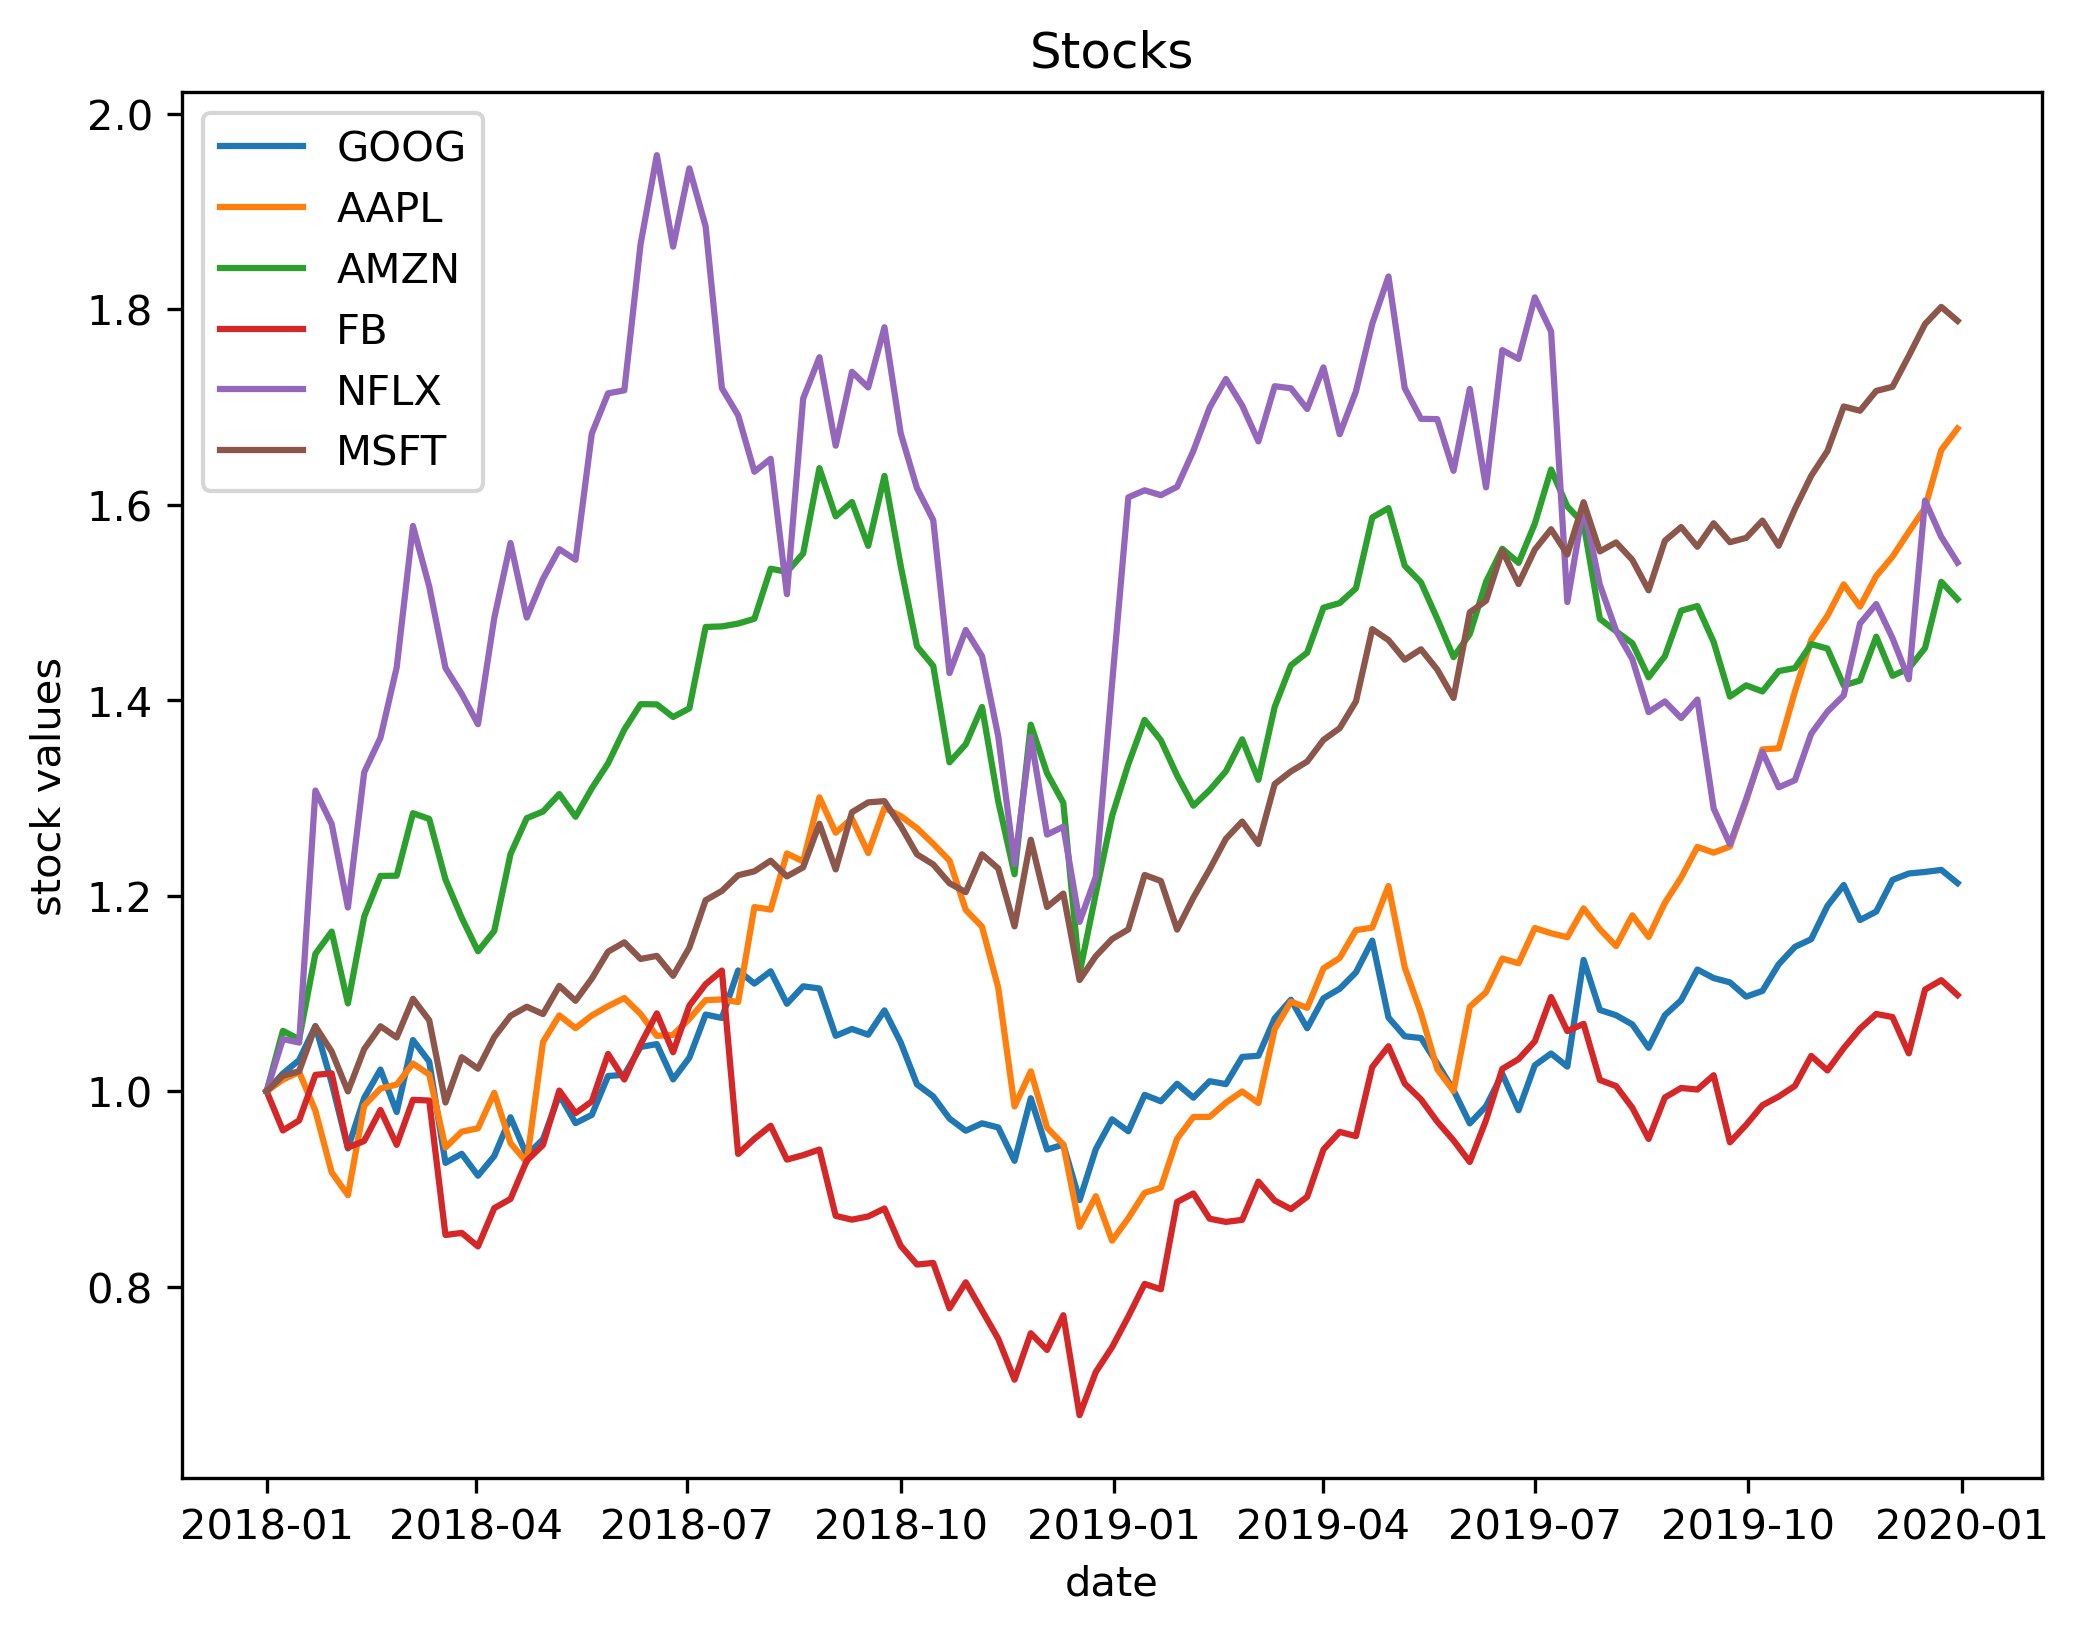

In [6]:
# YOUR CODE HERE
fig, ax = plt.subplots(dpi=300, figsize=(8,6))
date = pd.to_datetime(stocks['date']).dt.date
GOOG = stocks['GOOG']
AAPL = stocks['AAPL']
AMZN = stocks['AMZN']
FB   = stocks['FB']
NFLX = stocks['NFLX']
MSFT = stocks['MSFT']
ax.plot(date, GOOG)
ax.plot(date, AAPL)
ax.plot(date, AMZN)
ax.plot(date, FB)
ax.plot(date, NFLX)
ax.plot(date, MSFT)
plt.title('Stocks')
plt.ylabel('stock values')
plt.xlabel('date')
plt.legend(['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'])

# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 3:

Let's explore this dataset. Pose a question and create a plot that support drawing answers for your question.

Some possible questions:
- Are there differences between male and female when it comes to giving tips?
- What attribute correlate the most with tip?

Text(0.5, 1.0, 'Total bill of male and female')

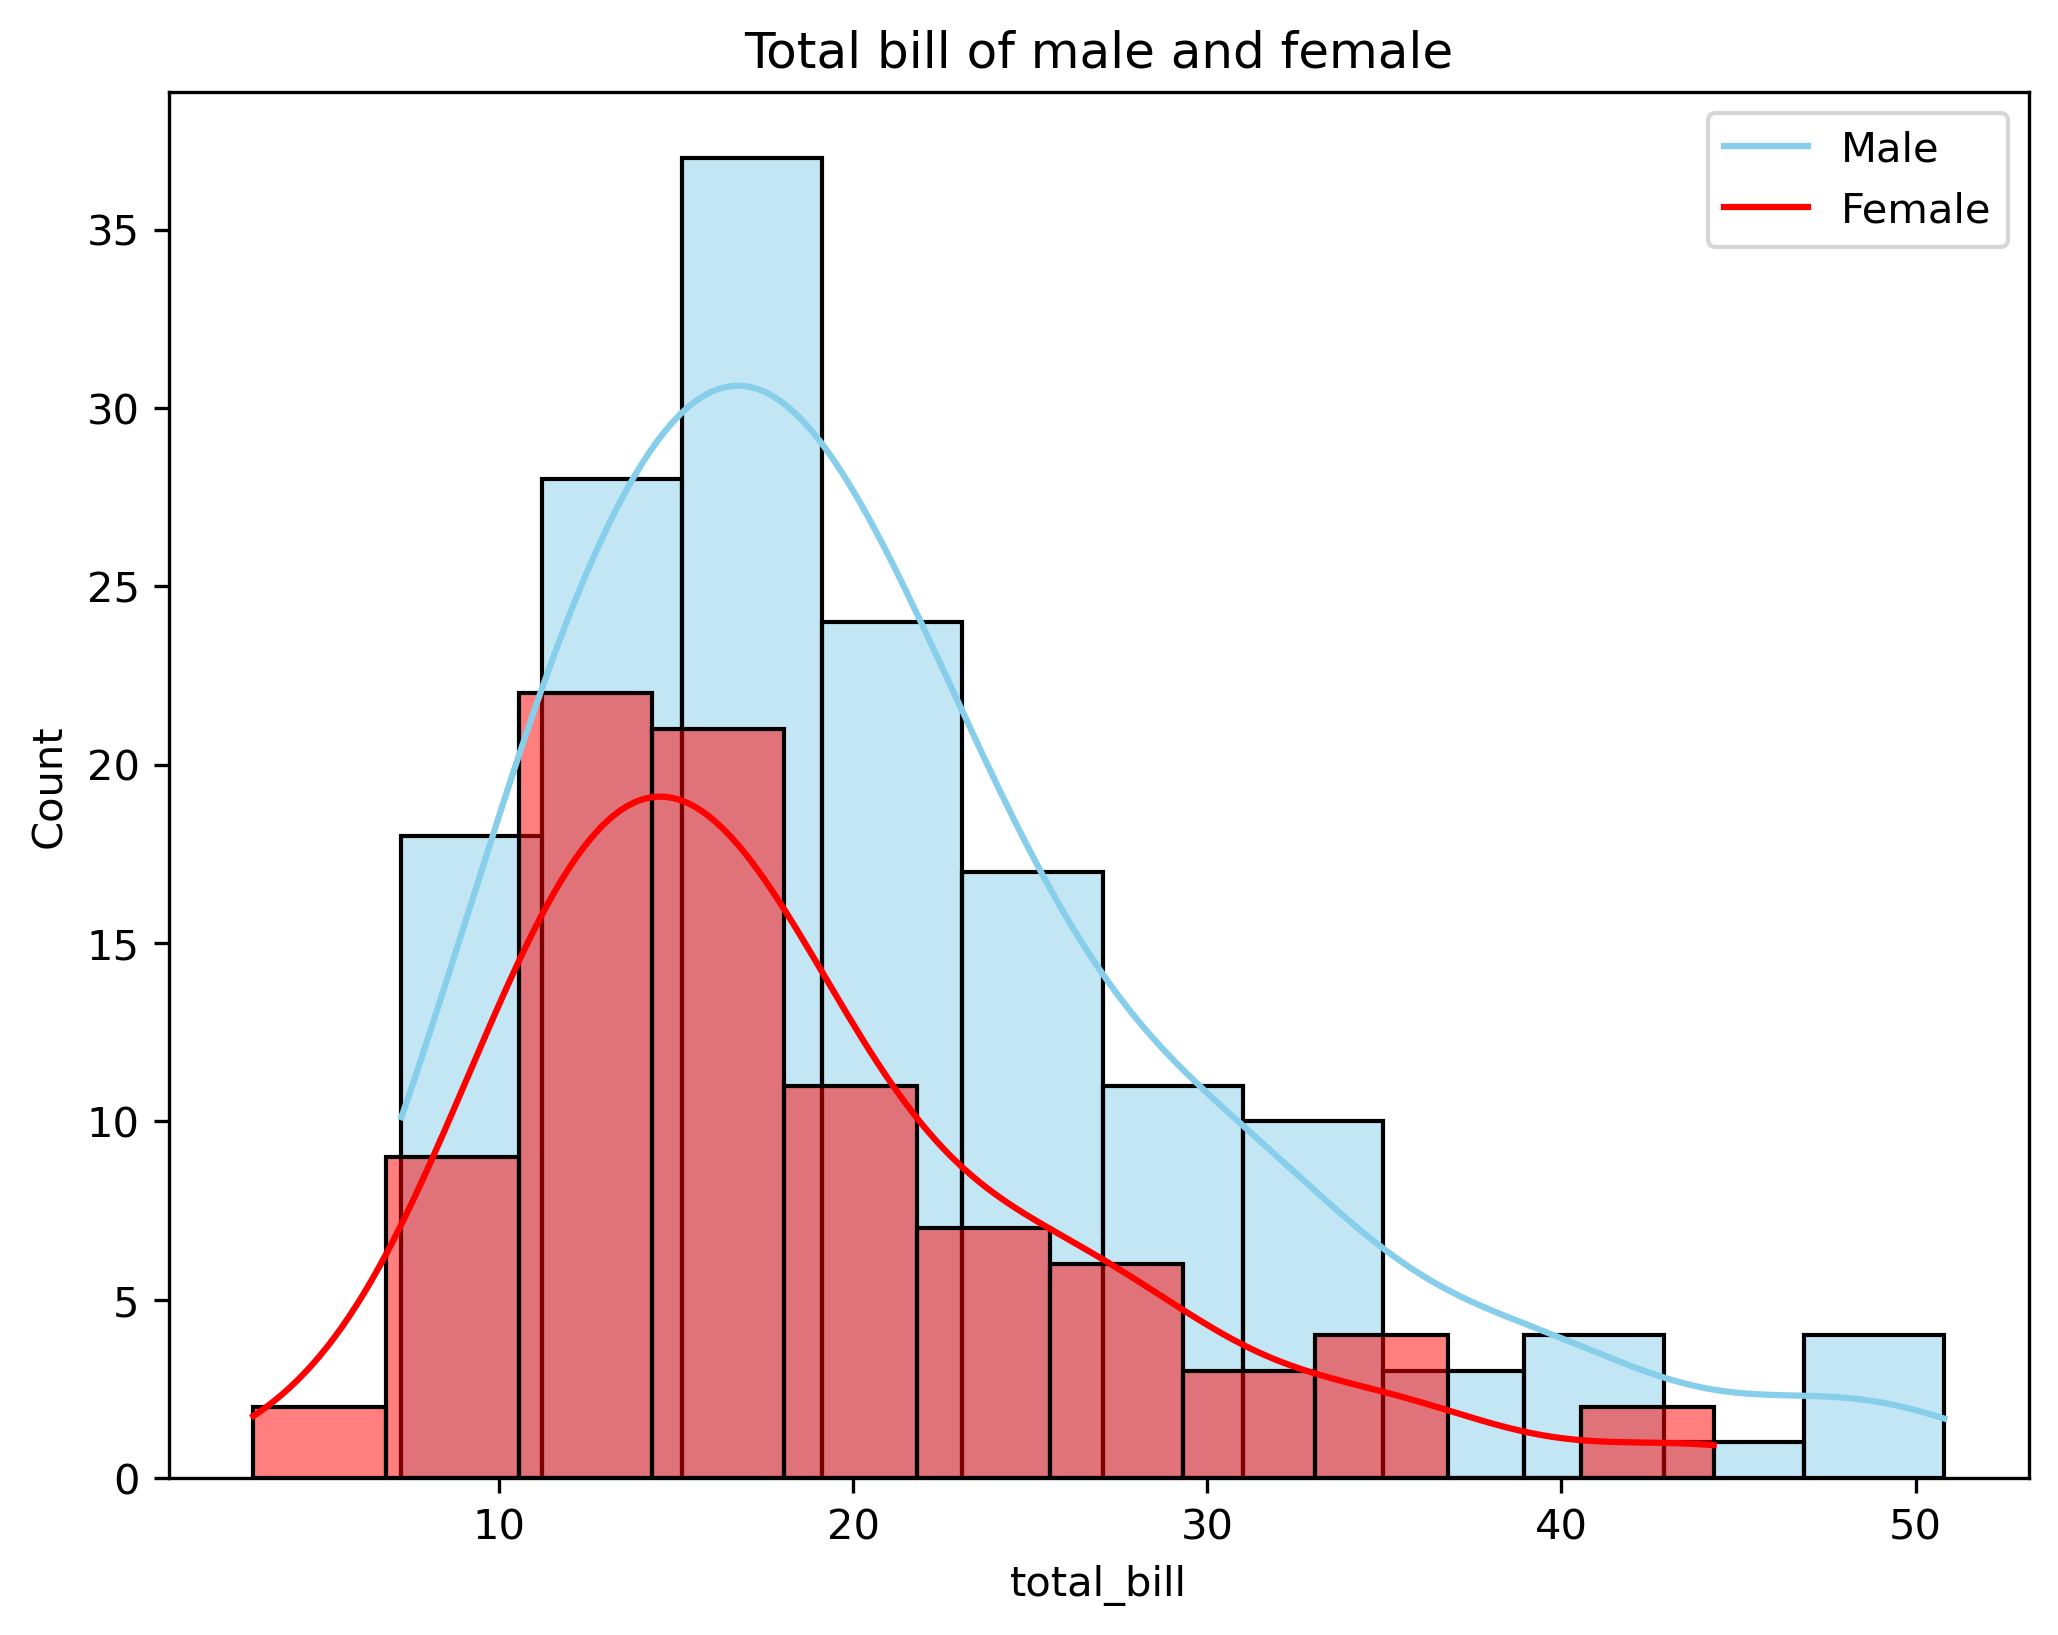

In [126]:
# YOUR CODE HERE
'''
Are there differences between male and female when it comes to the total bill?
'''
male = tips[tips['sex'] == 'Male']
female = tips[tips['sex'] == 'Female']

fig, ax = plt.subplots(dpi=300, figsize=(8,6))
# sns.histplot(male['tip'])
# sns.histplot(female['tip'])

sns.histplot(data=male, x="total_bill", color="skyblue", label="Sepal Length", kde=True)
sns.histplot(data=female, x="total_bill", color="red", label="Sepal Width", kde=True)
plt.legend(['Male', 'Female'])
plt.title("Total bill of male and female")

# Plotly Express

## Question 4:

Redo the above exercises (challenges 2 & 3) with plotly express. Create diagrams which you can interact with.

### The stocks dataset

*Hints*:
- Turn stocks dataframe into a structure that can be picked up easily with plotly express

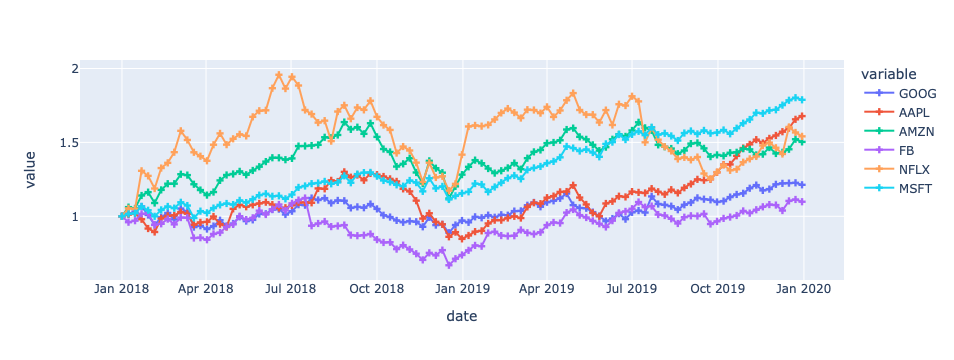

In [154]:
# YOUR CODE HERE
px.line(
    data_frame=stocks, 
    x='date', 
    y=['GOOG', 'AAPL', 'AMZN', 'FB', "NFLX", "MSFT"],
    markers=True,
    symbol_sequence=('cross',)
)

### The tips dataset

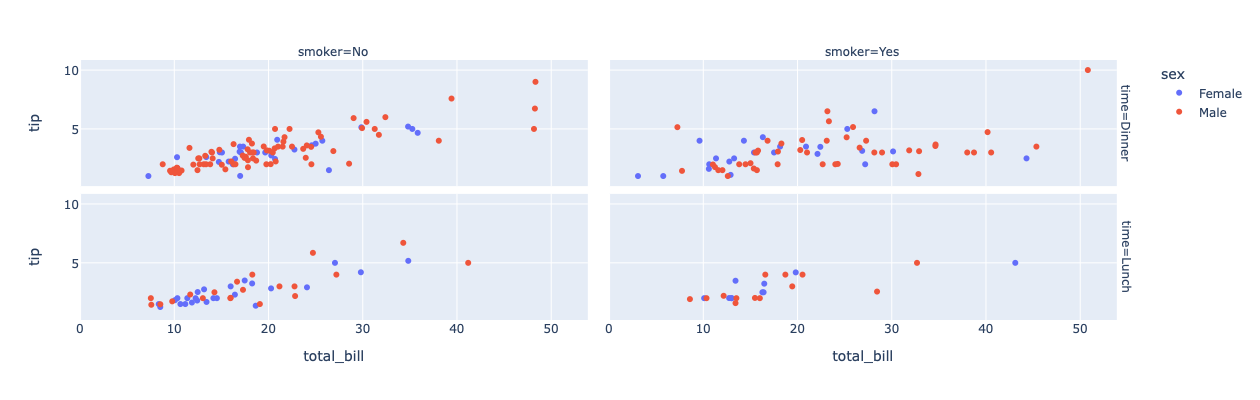

In [206]:
# YOUR CODE HERE
fig = px.scatter(tips, x="total_bill", y="tip", color="sex", 
                 facet_col="smoker", facet_row="time",
                 width=900, height=400)
# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'linear',
#         tick0 = 0,
#         dtick = 10
#     )
# )
fig.show()

## Question 5:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

In [13]:
#load data
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


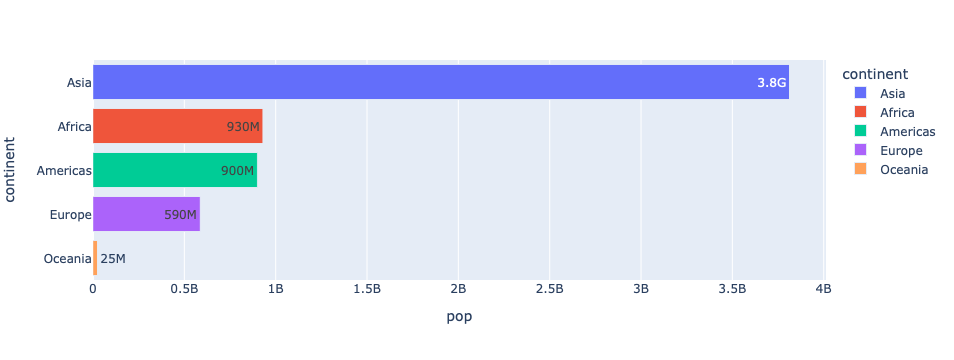

In [72]:
# YOUR CODE HERE
pop_2007 = df[df['year'] == 2007].groupby('continent').sum().reindex() # group by the continent
pop_2007 = pop_2007.sort_values('pop', ascending=False) # sort in descending order
pop_2007 = pop_2007.reset_index() # reset the continent index into column values
fig = px.bar(
    data_frame=pop_2007,
    y='continent',
    x='pop',
    color='continent',
    orientation='h',
    text=['3.8G', '930M', '900M', '590M', '25M'],
) # bar plotting
fig.show()